In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm

In [7]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

In [13]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad
    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b
    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

class LogReg(SGD):
    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))
    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad
    def predict_proba(self, X):
        return self.sigmoid(X, self.b)
    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

In [14]:
model = LogisticRegression()
logreg = LogReg()

# 1.
Выведите результаты работы библиотечной модели - в численном и в графическом виде.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Метрики классификации:")
print(classification_report(y_test, y_pred))

Метрики классификации:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        95
           1       0.97      0.98      0.98       105

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



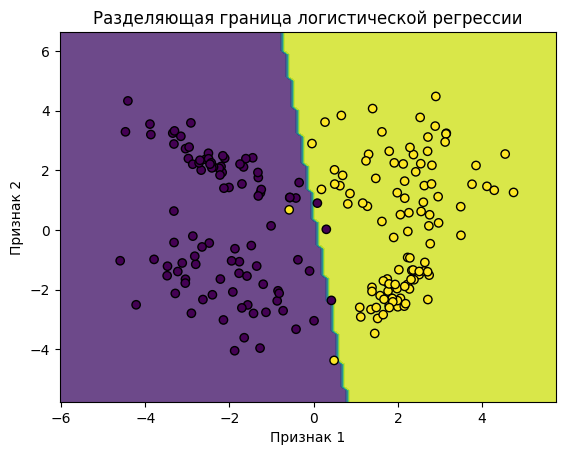

In [19]:
# Создание сетки точек для отображения разделяющей границы
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Отображение разделяющей границы и точек данных
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='o')
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.title("Разделяющая граница логистической регрессии")
plt.show()

# 2.
 Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

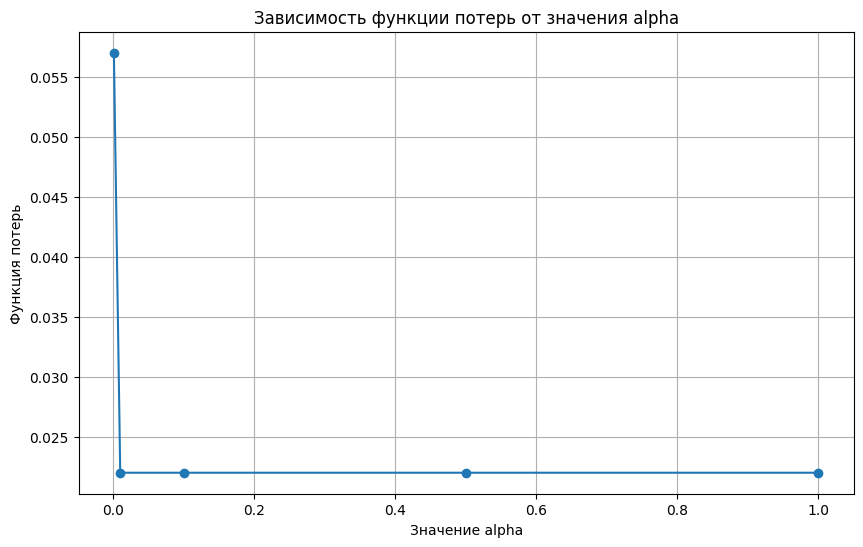

In [43]:
alpha_values = [0.001, 0.01, 0.1, 0.5, 1.0]

# Создайте и обучите модели с разными значениями alpha
losses = []
for alpha in alpha_values:
    model = LogReg(alpha=alpha)
    model.fit(X, y)
    y_pred = model.predict(X)
    accuracy = np.mean(y_pred == y)
    losses.append(1 - accuracy)

# Визуализация функции потерь для разных значений alpha
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, losses, marker='o')
plt.title('Зависимость функции потерь от значения alpha')
plt.xlabel('Значение alpha')
plt.ylabel('Функция потерь')
plt.grid()
plt.show()

# 3.
Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.

In [44]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
    def add_ones_column(self, X):
        ones = np.ones((X.shape[0], 1))
        return np.hstack((ones, X))
    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad
    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b
    def fit(self, X, y):
        X = self.add_ones_column(X)  # Добавление фиктивного столбца единиц
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

# 4.
Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.

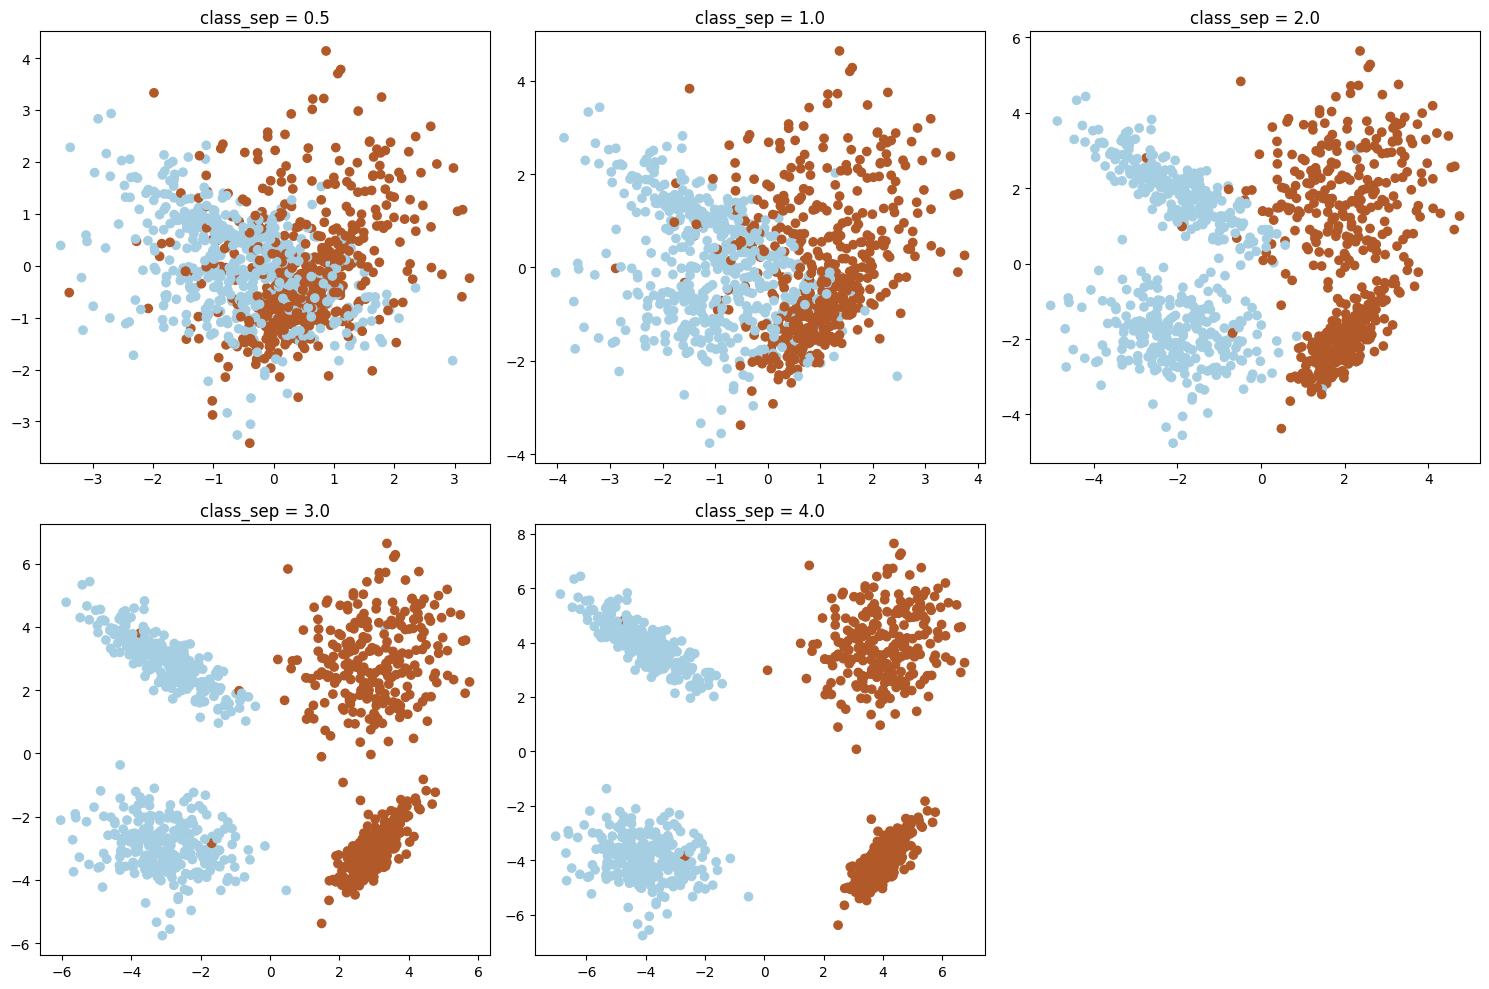

In [45]:
class_sep_values = [0.5, 1.0, 2.0, 3.0, 4.0]

# Создаем датасеты
plt.figure(figsize=(15, 10))
for i, class_sep in enumerate(class_sep_values):
    X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, class_sep=class_sep, random_state=1)

    plt.subplot(2, 3, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.title(f'class_sep = {class_sep}')

plt.tight_layout()
plt.show()

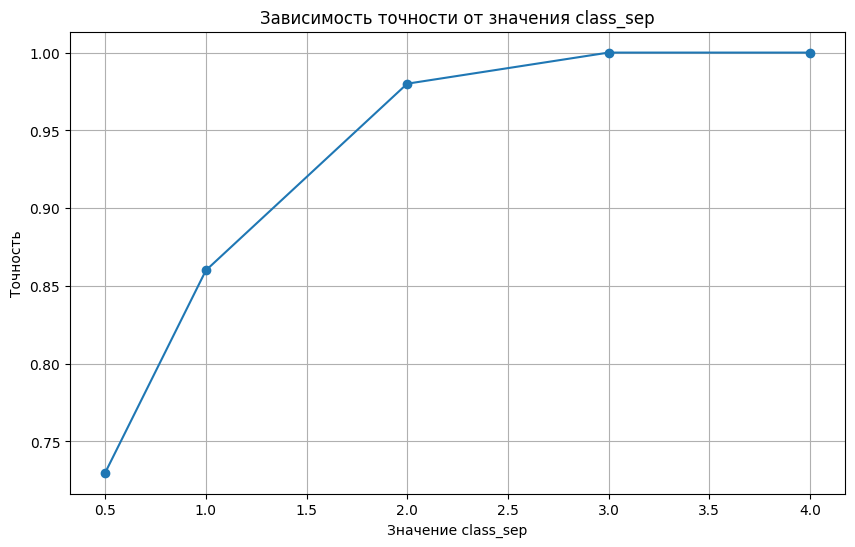

In [46]:
accuracies = []

for class_sep in class_sep_values:
    X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, class_sep=class_sep, random_state=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LogReg(alpha=0.01)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    accuracies.append(accuracy)

# Визуализация зависимости точности от class_sep
plt.figure(figsize=(10, 6))
plt.plot(class_sep_values, accuracies, marker='o')
plt.title('Зависимость точности от значения class_sep')
plt.xlabel('Значение class_sep')
plt.ylabel('Точность')
plt.grid()
plt.show()

#5.
Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.

In [47]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Генерация датасета с большим числом признаков (100)
X, y = make_classification(n_samples=1000, n_features=100, n_informative=50, n_redundant=25, n_classes=2, random_state=1)

# Разделение на обучающий и тестовый набор данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
model = LogReg(alpha=0.01)
model.fit(X_train, y_train)

# Прогноз и оценка точности на тестовом наборе данных
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f'Точность модели: {accuracy}')

Точность модели: 0.71


#6.
Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.

In [53]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_classes=5, random_state=1)

# Разделение на обучающий и тестовый набор данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание списка моделей для каждого класса
models = []
for class_label in np.unique(y_train):
    model = LogisticRegression()
    # Преобразование задачи в бинарную классификацию (классификация против всех)
    y_binary = (y_train == class_label).astype(int)
    model.fit(X_train, y_binary)
    models.append(model)

# Прогноз для каждой модели
predictions = np.zeros((X_test.shape[0], len(models)))
for i, model in enumerate(models):
    predictions[:, i] = model.predict_proba(X_test)[:, 1]

# Выбор класса с наивысшей уверенностью
y_pred = np.argmax(predictions, axis=1)

# Оценка точности
accuracy = np.mean(y_pred == y_test)
print(f'Точность модели: {accuracy}')

Точность модели: 0.61


#7.
Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression.

In [55]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_classes=5, random_state=1)

# Разделение на обучающий и тестовый набор данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Получение вероятностей для каждого объекта
probabilities = model.predict_proba(X_test)

# Вывод вероятностей
np.set_printoptions(precision=2, suppress=True)
print("Вероятности принадлежности к классам:")
print(probabilities)

Вероятности принадлежности к классам:
[[0.86 0.04 0.01 0.08 0.01]
 [0.17 0.08 0.31 0.42 0.03]
 [0.17 0.33 0.11 0.32 0.06]
 [0.02 0.73 0.12 0.07 0.06]
 [0.4  0.48 0.01 0.09 0.03]
 [0.24 0.15 0.06 0.4  0.15]
 [0.04 0.14 0.13 0.01 0.68]
 [0.07 0.21 0.06 0.34 0.31]
 [0.09 0.05 0.61 0.22 0.04]
 [0.07 0.2  0.02 0.66 0.04]
 [0.01 0.44 0.03 0.48 0.05]
 [0.8  0.02 0.02 0.13 0.04]
 [0.1  0.35 0.12 0.38 0.04]
 [0.1  0.06 0.63 0.18 0.03]
 [0.5  0.01 0.01 0.41 0.07]
 [0.19 0.05 0.12 0.04 0.61]
 [0.06 0.17 0.08 0.05 0.64]
 [0.12 0.67 0.06 0.11 0.05]
 [0.19 0.01 0.68 0.05 0.07]
 [0.3  0.06 0.06 0.19 0.39]
 [0.03 0.29 0.04 0.14 0.51]
 [0.   0.95 0.04 0.01 0.  ]
 [0.01 0.15 0.68 0.02 0.14]
 [0.04 0.05 0.45 0.14 0.32]
 [0.   0.84 0.02 0.09 0.05]
 [0.16 0.1  0.01 0.51 0.22]
 [0.15 0.24 0.04 0.51 0.06]
 [0.   0.88 0.04 0.08 0.  ]
 [0.02 0.34 0.06 0.02 0.57]
 [0.24 0.13 0.11 0.07 0.45]
 [0.01 0.84 0.04 0.11 0.01]
 [0.77 0.03 0.03 0.11 0.05]
 [0.05 0.34 0.05 0.01 0.54]
 [0.05 0.01 0.19 0.05 0.7 ]
 [0.91 0.0